# NLP : Natural Language Processing 
 

- Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

SOURCE: https://en.wikipedia.org/wiki/Natural_language_processing

### RFERENCES:
    
    DATA: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
    
    TUTORIAL : https://www.coursera.org/learn/natural-language-processing-tensorflow/lecture/uskDE/notebook-for-lesson-3

### FIRST ATTEMPT TOWARDS NLP

- Natural Language processing is considered a difficult problem in computer science. It's the nature of the human language that makes NLP difficult. While humans can easily master a language, the ambiguity and imprecise characteristics of the natural languages are what make NLP difficult for machines to implement.

- Playing with words is difficult for Neural Networks as we can't feed the Words into the Neural Network, so there is a need to convert those words into Numbers for Perceptrons to understand

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json


In [45]:
import json

In [46]:
# with open("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json","r") as f:
#     datastore = json.load(f)

# Loading the Data

In [47]:
data = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json",lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [48]:
data.shape

(26709, 3)

In [49]:
# This will be treated as a training data.
sentences = list(data['headline'])
labels = list(data['is_sarcastic'])

# Will not use for this case.
urls = list(data['article_link'])

In [50]:
## Run this cell to check the sentences list:
#sentences

In [51]:
print(len(sentences))
print(len(labels))

26709
26709


# Fitting the Data

## Constructing a Tokenizer:

In [52]:
## Let's develop a word index using Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(oov_token= "<OOV'>")   
## OOV stands for Out of Vocabulary
## Used for labelling words which are not in Word-Index or Vocabulary of the model.

## Fitting the tokenizer on the sentences:
tokenizer.fit_on_texts(sentences)
# Sentences here contains the headlines of sarcasm dataset.

## Now we will create Vocabulary or Word_index.
## This will be a dictionary.
## With words as key and Index as values.
word_index = tokenizer.word_index
## This will numbered all the words present in the headlines
## Also there will be no duplicacy in the Index.


print("Number of Unique Words in the Headlines: ",len(word_index))

Number of Unique Words in the Headlines:  29657


In [53]:
print(type(word_index))
# word_index

<class 'dict'>


In [54]:
## Now let's develop the Sequences:

sequences = tokenizer.texts_to_sequences(sentences)
print("The Number of Sequences is Equal to : ",len(sequences))
print()
print("First ten sequences are: ")
print()
for i in range(10):
    print(sequences[i])
    print()

The Number of Sequences is Equal to :  26709

First ten sequences are: 

[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]

[4, 8435, 3338, 2746, 22, 2, 166, 8436, 416, 3112, 6, 258, 9, 1002]

[145, 838, 2, 907, 1749, 2093, 582, 4719, 221, 143, 39, 46, 2, 10736]

[1485, 36, 224, 400, 2, 1832, 29, 319, 22, 10, 2924, 1393, 6969, 968]

[767, 719, 4720, 908, 10737, 623, 594, 5, 4, 95, 1309, 92]

[10738, 4, 365, 73]

[4, 6970, 351, 6, 461, 4274, 2195, 1486]

[19, 479, 39, 1168, 31, 155, 2, 99, 83, 18, 158, 6, 32, 352]

[249, 3623, 6971, 555, 5274, 1995, 141]

[2094, 326, 347, 401, 60, 15117, 6, 4, 3896]



- Now as we have done the creation, let's test it on random sentence and see whether it can detect every word of that sentence or not.

# Casual Testing

In [55]:
test=[
    "i love my country"
]

test_seq = tokenizer.texts_to_sequences(test)
print("Sequence for :",test[0],test_seq)



Sequence for : i love my country [[80, 144, 79, 434]]


- Let's verify it.

In [56]:
print(word_index['i'])
print(word_index['love'])
print(word_index['my'])
print(word_index['country'])

80
144
79
434


- So, yeah, that was quite simple.
- This also means that we have a lot in our Vocabulary.

# WORDCLOUD VISUALIZATION

- A tag cloud or Word cloud is a novelty **visual representation of text data**, typically used to depict keyword metadata on websites, or to visualize free form text.
- Tags are usually single words, and the importance of each tag is shown with font size or color.

#### Reference: 

- DOCS: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
- Visualization Aid: https://www.kaggle.com/venky73/sarcasm

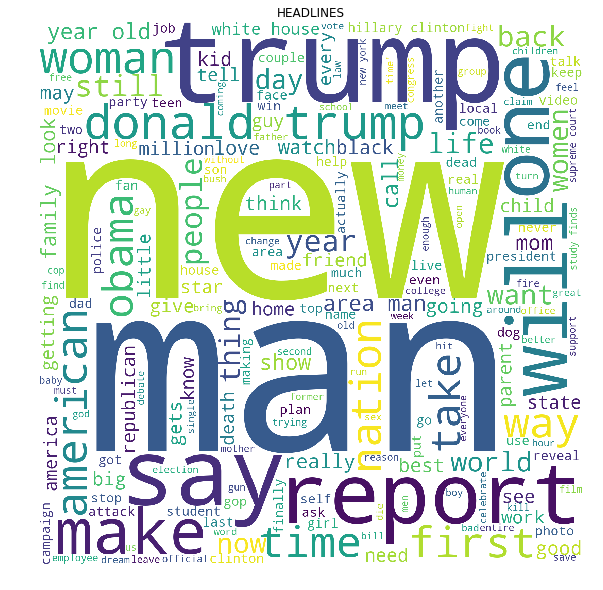

In [57]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

word = str(sentences[::])
## As sentences here is a list with multiple strings(used above)
## So wordcloud can only be fed strings and not list that have strings.
## So every string in the sentences is put into a single variable word here
## Which can be fed into the wordcloud.


stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                stopwords = stopwords).generate(word) 
  
# plotting the Wordcloud Image                        
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off")  
plt.title("HEADLINES")
plt.show()

**What this plot Explains**

- This plot shows the amount of a particular word occuring in headlines.

- For eg: man and new occured the most as there size is the greatest and other words like: trump,one,say,report are next in line.